**Prob 1.** Create and print a 2-dimensional NumPy array of shape (5, 5) filled with random integers between 1 and 100. Perform the following tasks:

In [2]:
import numpy as np

# Create a 5x5 NumPy array filled with random integers between 1 and 100
arr = np.random.randint(1, 101, size=(5, 5))
print("Original Array:")
print(arr)

Original Array:
[[ 75  39  42  75  74]
 [ 48  94  39  51   4]
 [ 84  90  77  35   8]
 [100  62  43  94  27]
 [ 19  93  24   9  45]]


**Task 1.** Extract and print the middle element of the array using NumPy indexing.

In [3]:
middle_element = arr[2, 2]
print(f"Middle element of the array: {middle_element}")

Middle element of the array: 77


**Task 2.** Calculate and print the mean of each row of the array.

In [4]:
row_means = np.mean(arr, axis=1)
print("Mean of each row:")
print(row_means)

Mean of each row:
[61.  47.2 58.8 65.2 38. ]


**Task 3.** Create a new array that contains only the elements from the original array that are greater than the overall mean of the array.

In [5]:
overall_mean = np.mean(arr)
greater_than_mean = arr[arr > overall_mean]
print("Elements greater than the overall mean:")
print(greater_than_mean)

Elements greater than the overall mean:
[ 75  75  74  94  84  90  77 100  62  94  93]


**Task 4.** Write a Python function numpy_spiral_order(matrix) that takes a NumPy matrix and returns a list containing the elements visited in a spiral order.  
Example:  
Hints:
Use np.random.randint() to create the initial array arr.
Use NumPy functions like np.mean() and boolean indexing to perform calculations and extract elements.

In [48]:
def numpy_spiral_order(matrix):
    result = []
    while matrix.size > 0:
        result.append(matrix[0])  # Append first row
        matrix = np.rot90(matrix[1:])  # Rotate remaining matrix counterclockwise
    return result

# Example usage:
spiral_order = numpy_spiral_order(arr)
print("Spiral order traversal of the array:")
print(spiral_order)
print()

flat_list = sum((arr.tolist() for arr in spiral_order), [])
print(f'List containg the elemnts visited in the spiral order:{flat_list}')

Spiral order traversal of the array:
[array([75, 39, 42, 75, 74]), array([ 4,  8, 27, 45]), array([ 9, 24, 93, 19]), array([100,  84,  48]), array([94, 39, 51]), array([35, 94]), array([43, 62]), array([90]), array([77])]

List containg the elemnts visited in the spiral order:[75, 39, 42, 75, 74, 4, 8, 27, 45, 9, 24, 93, 19, 100, 84, 48, 94, 39, 51, 35, 94, 43, 62, 90, 77]


**Prob 2.** Now let’s try to apply Python libraries on a dataset of Video Game Sales!
Create a Jupyter Notebook or a Google Colab Notebook, download the dataset in the drive link, and solve the following questions using the required Python libraries:

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('videogamesales.csv')
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05
1,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03
2,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01
3,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01
4,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01


**Task 1.** Add a column of ‘global_sales’ showing the total sales of all the different regions to the data frame and sort (highest first) and print the DataFrame according to it.

In [56]:
# Add a 'global_sales' column
df['global_sales'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

# Sort the DataFrame by 'global_sales' in descending order
df_sorted = df.sort_values(by='global_sales', ascending=False)

# Display the sorted DataFrame
df_sorted.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,global_sales
6109,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
122,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
8315,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
9743,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
705,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


**Task 2.** Display a plot of the total number of copies sold of each genre globally.

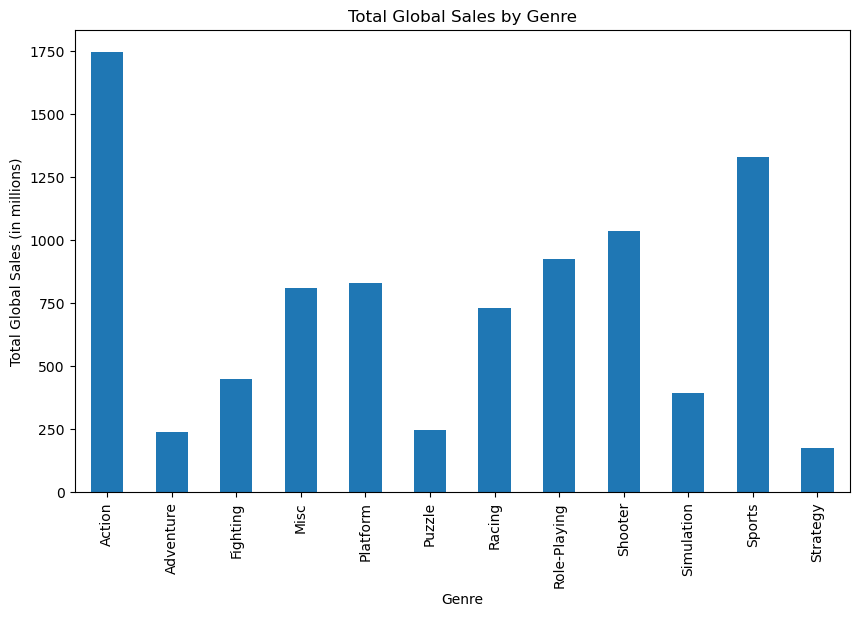

In [18]:
# Group by genre and sum the global sales
genre_sales = df.groupby('Genre')['global_sales'].sum()

# Plot the total number of copies sold of each genre globally
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Total Global Sales (in millions)')
plt.title('Total Global Sales by Genre')
plt.show()

**Task 3.** Filter out only the games containing ‘Grand Theft Auto’ in their name and display the following as a DataFrame: 

i. their name  
ii. the platform they were released on  
iii. the year they were released in  
iv. the sum of sales in only Europe and Japan

In [54]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

# Filter out games containing 'Grand Theft Auto' in their name
gta_games = df[df['Name'].str.contains('Grand Theft Auto', case=False, na=False)]

# Select the required columns and calculate the sum of sales in Europe and Japan
gta_games_filtered = gta_games[['Name', 'Platform', 'Year', 'EU_Sales', 'JP_Sales']]
gta_games_filtered['EU_JP_Sales'] = gta_games_filtered['EU_Sales'] + gta_games_filtered['JP_Sales']

# Display the DataFrame
gta_games_filtered[['Name', 'Platform', 'Year', 'EU_JP_Sales']].head()

,Name,Platform,Year,EU_JP_Sales
999,Grand Theft Auto,PS,1997.0,1.39
1290,Grand Theft Auto 2,PS,1998.0,2.07
1469,"Grand Theft Auto: Mission Pack #1, London 1969",PS,1998.0,0.04
2323,Grand Theft Auto III,PS2,2001.0,4.81
2805,Grand Theft Auto: Vice City,PS2,2002.0,5.96


**Task 4.** Display a pie chart of the total sales of all Grand Theft Auto games combined in North America, Europe, Japan, and other sales.

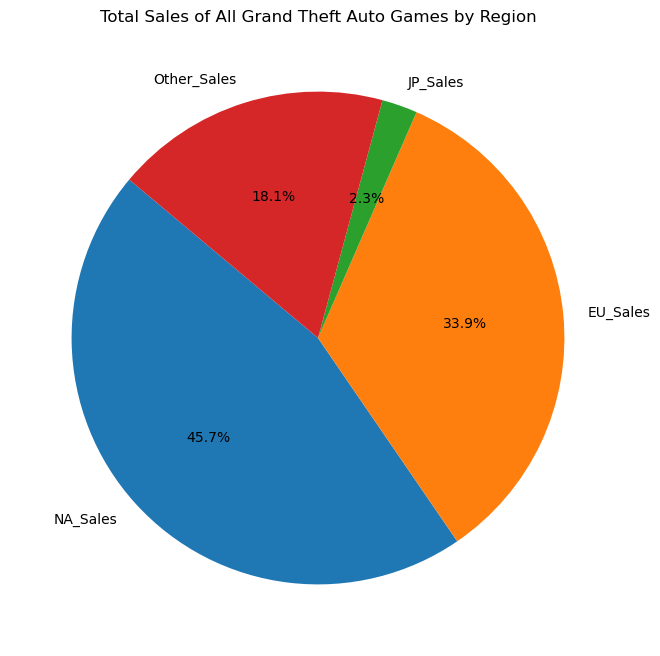

In [55]:
# Calculate the total sales of all GTA games combined in each region
gta_sales = gta_games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Plot a pie chart
plt.figure(figsize=(8, 8))
gta_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Total Sales of All Grand Theft Auto Games by Region')
plt.ylabel('')
plt.show()